# Kapitel 3 - Ein einfaches neuronales Netz

## Die Entscheidung

In [1]:
def entscheidung(summe):
    """Berechnung der Entscheidung zum Wert summe
        Input: summe
        Output: 1, falls summe >= 1
                0 sonst
    """
    if summe >= 1:
        return 1
    else:
        return 0
#-------------------------------------------------
# Berechnung der Entscheidung
ergebnis = entscheidung(1)
# Ausgabe in Zelle
print(ergebnis)

1


## Dokumentationsstring

In [2]:
print(entscheidung.__doc__)

Berechnung der Entscheidung zum Wert summe
        Input: summe
        Output: 1, falls summe >= 1
                0 sonst
    


## Stufenfunktion

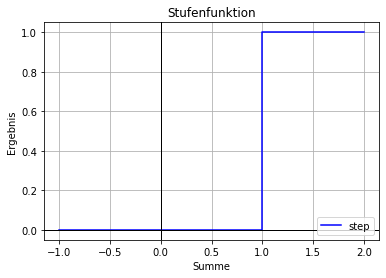

In [3]:
# Import Module
import matplotlib.pyplot as plt
# Wichtig!
%matplotlib inline

# x/y Werte
x = [-1, 0, 0.999, 1, 2]
# Berechnung y(x)
y = [ entscheidung(i) for i in x ]
# der Graph (blaue Stufe und Bezeichnung 'step')
plt.step(x, y, '-b', label='step')

# Achsen setzen
plt.grid(True)
# Achsen verstärken
plt.axhline(0, color='black', lw=1)
plt.axvline(0, color='black', lw=1)

# Achsenbeschriftung
plt.xlabel('Summe')
plt.ylabel('Ergebnis')
plt.title('Stufenfunktion')

# Legende platzieren
plt.legend(loc='lower right')

# anzeigen
plt.show()

## Scatter Plot

Der Vektor x1:  [0 0 1 1]


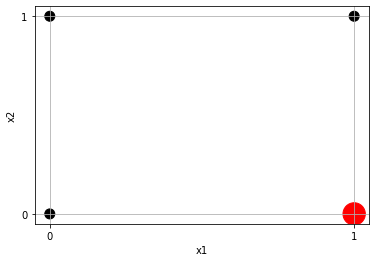

In [4]:
import matplotlib.pyplot as plt
# Wichtig!
%matplotlib inline

import numpy as np
# Koordinaten
x1 = np.array([0, 0, 1, 1])
x2 = np.array([0, 1, 0, 1])
# Farben
color = np.array(['black', 'black', 'red', 'black'])
# Punktgrößen
size = np.array([100, 100, 500, 100])

# Ausgabe Vektor x1
print('Der Vektor x1: ', x1)

# Achsen setzen
plt.grid(True)

# Plot zeichnen
plt.scatter(x1, x2, c=color, s=size)

# Achsen setzen
plt.xlabel('x1')
plt.ylabel('x2')

# Achseneinteilung
plt.xticks([0.0, 1.0])
plt.yticks([0.0, 1.0])

# anzeigen
plt.show()

## Iris Scatter Plot

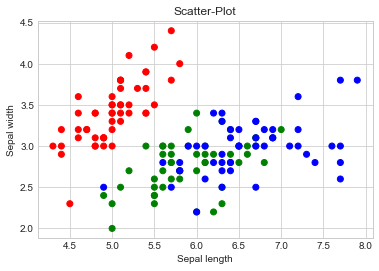

In [15]:
# import
import matplotlib.pyplot as plt
import numpy as np
# Wichtig!
%matplotlib inline

# open csv file
fobj = open("iris.csv", "r")
# Koordinaten
x1 = []
x2 = []
x3 = []
x4 = []

# Farben
colors = []
# mapping per dictionary
iris_colors = {'Iris-setosa' : 'red',
                'Iris-versicolor' : 'green',
                'Iris-virginica' : 'blue'}

# read line by line
for line in fobj:
    words = line.rstrip().split(",")
    # Leerzeilen skippen
    if len(words) != 5:
        continue
    # sepal length
    x1.append(float(words[0]))
    # sepal width
    x2.append(float(words[1]))
    # petal length
    x3.append(float(words[2]))
    # petal width
    x4.append(float(words[3]))
    # colors
    colors.append(iris_colors[words[4]])

# close file
fobj.close()

# gitter
plt.style.use('seaborn-whitegrid')
plt.grid(True)
# Beschriftung
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Scatter-Plot')

# ausgabe
plt.scatter(np.array(x1), np.array(x2), color=colors)
plt.show()

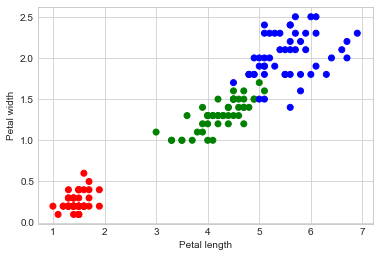

In [16]:
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.scatter(np.array(x3), np.array(x4), color=colors)
plt.show()

## Skalarprodukt

In [17]:
import numpy as np

# erzeuge array
x = np.array([0, 1])
w = np.array([0.5, 0.7])

# ausgabe x
print("x = ", x)
# ausgabe w
print("w = ", w)

print("w*x = ", w*x)

print("np.dot(w,x) = ", np.dot(w,x))

print("w.dot(x) = ", w.dot(x))

x =  [0 1]
w =  [0.5 0.7]
w*x =  [0.  0.7]
np.dot(w,x) =  0.7
w.dot(x) =  0.7


## Das erste Perceptron

In [18]:
# Perceptron Forward Path
import matplotlib.pyplot as plt
import numpy as np

# 3d input (bias-neuron, fr. karotte, hr. lauch), 4 vektoren
X = np.array([
    [1,0,0],
    [1,0,1],
    [1,1,0],
    [1,1,1]
])
# gewünschte Ergebnisse
y = np.array([0,1,1,1])

# Heaviside-Funktion
def heaviside( summe ):
    """Berechnung der Entscheidung zum Wert summe
        Input: summe
        Output: 1, falls summe >= 0,
                0 sonst
    """
    if summe >= 0:
        return 1
    else:
        return 0

# Perceptron Berechnung
def perceptron_eval(X, y):
    # Gesamtfehler
    gesamtfehler = 0
    # Gewichte wählen
    w = np.array([-1, 1, 1])
    
    for i, x in enumerate(X):
        summe = np.dot(w,x)
        ergebnis = heaviside(summe)
        # Fehler
        fehler = np.abs(ergebnis - y[i])
        # summiere auf
        gesamtfehler += fehler
        
        # ausgabe
        print("Fr. Karotte = {}, Hr. Lauch = {}, Ergebnis = {}, Fehler = {}".format(x[1], x[2], y[i], fehler))
    
    return gesamtfehler

gesamtfehler = perceptron_eval(X, y)
print("Gesamtfehler = %1d" % (gesamtfehler))

Fr. Karotte = 0, Hr. Lauch = 0, Ergebnis = 0, Fehler = 0
Fr. Karotte = 0, Hr. Lauch = 1, Ergebnis = 1, Fehler = 0
Fr. Karotte = 1, Hr. Lauch = 0, Ergebnis = 1, Fehler = 0
Fr. Karotte = 1, Hr. Lauch = 1, Ergebnis = 1, Fehler = 0
Gesamtfehler = 0


## Aufgabe: Roboterschutz

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# 3d input (bias-neuron, sensor links, sensor rechts), 4 vektoren
X = np.array([
    [1,0,0],
    [1,0,1],
    [1,1,0],
    [1,1,1]
])
# gewünschte Ergebnisse
y = np.array([0,0,0,1])

# Heaviside-Funktion
def heaviside( summe ):
    """Berechnung der Entscheidung zum Wert summe
        Input: summe
        Output: 1, falls summe >= 0,
                0 sonst
    """
    if summe >= 0:
        return 1
    else:
        return 0

# Perceptron Berechnung
def perceptron_eval(X, y):
    # Gesamtfehler
    gesamtfehler = 0
    # Gewichte wählen
    w = np.array([-2, 1, 1])
    
    for i, x in enumerate(X):
        summe = np.dot(w,x)
        ergebnis = heaviside(summe)
        # Fehler
        fehler = np.abs(ergebnis - y[i])
        # summiere auf
        gesamtfehler += fehler
        
        # ausgabe
        print("Sensor Links = {}, Sensor Rechts = {}, Ergebnis = {}, Fehler = {}".format(x[1], x[2], y[i], fehler))
    
    return gesamtfehler

gesamtfehler = perceptron_eval(X, y)
print("Gesamtfehler = %1d" % (gesamtfehler))

Sensor Links = 0, Sensor Rechts = 0, Ergebnis = 0, Fehler = 0
Sensor Links = 0, Sensor Rechts = 1, Ergebnis = 0, Fehler = 0
Sensor Links = 1, Sensor Rechts = 0, Ergebnis = 0, Fehler = 0
Sensor Links = 1, Sensor Rechts = 1, Ergebnis = 1, Fehler = 0
Gesamtfehler = 0
